In [ ]:
#step1 import libaray
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,  ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import sys
# Plot inline
%matplotlib inline


# step2 dimension of our image
img_width, img_height = 150, 150

#train_data = "D:/project_data/train"
#validation_data = "D:/project_data/validation"
train_data = "D:/project_data/treat/train"
validation_data = "D:/project_data/treat/validation"
train_samples = 1800
#train_samples = 120
validation_samples = 480
#validation_samples = 36
epochs = 10
batch_size = 24

if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height )
else:
    input_shape = (img_width, img_height,3)
    
model = Sequential()
#model.add(ZeroPadding2D(padding=(3, 3))(input_shape)
#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
model.add(Conv2D(32,(3,3), input_shape = input_shape))
#model.add(ZeroPadding2D(padding=(3, 3), data_format=None))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,input_shape = input_shape))
#model.add(BatchNormalization(axis=-1,input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3))(input_shape = input_shape)
#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
model.add(Conv2D(32,(3,3)))
#model.add(ZeroPadding2D(padding=(3, 3), data_format=None))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3))(input_shape = input_shape)          
#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
#model.add(Conv2D(64,(3,3), strides=(1, 1)))
#model.add(ZeroPadding2D(padding=(3, 3), data_format=None))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3))(input_shape = input_shape)
#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
model.add(Conv2D(64, (3, 3)))
#model.add(ZeroPadding2D(padding=(3, 3), data_format=None))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
#Save the model after every epoch.
callbacks = []
callbacks.append(ModelCheckpoint('weight.{epoch:05d}-{val_acc:.5f}.h5', monitor='val_acc', save_best_only=True, period=1))


                #train_generator,train_history=model.fit_generator(
train_history=model.fit_generator(
              train_generator,
              steps_per_epoch=train_samples//batch_size,
              epochs=epochs,
              validation_data=validation_generator,
              validation_steps=validation_samples//batch_size)

#train_history = model.fit_generator(
                #steps_per_epoch=train_samples,
                #epochs=epochs,
                #validation_data=validation_generator,
                #validation_steps=validation_samples,
                 #verbose=0, workers=2,
                 #callbacks=callbacks) #verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
                                       #workers: maximum number of processes to spin up

#說明:evaluate_generator(self, generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
#score = model.evaluate_generator(validation_generator, validation_samples/batch_size, workers=12)
score = model.evaluate_generator(validation_generator, validation_samples/batch_size)

#說明:predict_generator(self, generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
#scores = model.predict_generator(validation_generator, validation_samples/batch_size, workers=12)
scores = model.predict_generator(validation_generator, validation_samples/batch_size)

pd.crosstab(validation_generator,scores, rownames=['label'], colnames=['predict'])

correct = 0
for i, n in enumerate(validation_generator.filenames):
    if n.startswith("NG") and scores[i][0] <= 0.5:
        correct += 1
    if n.startswith("OK") and scores[i][0] > 0.5:
        correct += 1

print("Correct:", correct, " Total: ", len(validation_generator.filenames))
#print("Loss: ", score[0], "Accuracy: ", score[1])
print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

model.save_weights('first_test_1.h5')

C:\Users\William\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_51 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_52 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 34, 34, 64)        18496     
__________

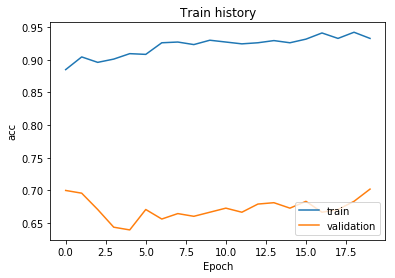

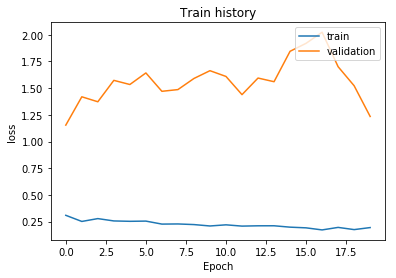

In [14]:
#step1 import libaray
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense, advanced_activations,Input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.imagenet_utils import preprocess_input 
from keras import backend as K
from matplotlib import pyplot as plt
import random
#random.seed(3)
%matplotlib inline
# step2 dimension of our image
img_width, img_height = 150, 150

#train_data = "D:/project_data/train"
#validation_data = "D:/project_data/validation"
train_data = "D:/project_data/treat/train"
validation_data = "D:/project_data/treat/validation"
model_weights_path = 'first_test_1.h5'
train_samples = 1800
#train_samples = 120
validation_samples = 480
#validation_samples = 36
epochs = 20
batch_size = 24

if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height )
else:
    input_shape = (img_width, img_height,3)

    
model = Sequential()
#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
model.add(Conv2D(32,(3,3), input_shape = input_shape))
#model.add(Conv2D(32,(3,3), input_shape = input_shape))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
#model.add(advanced_activations.LeakyReLU(alpha=0.3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
model.add(Conv2D(32,(3,3)))
#model.add(Conv2D(32,(3,3)))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                            #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
#model.add(advanced_activations.LeakyReLU(alpha=0.3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
#model.add(Conv2D(64,(3,3), strides=(1, 1), input_shape = input_shape))
#model.add(Conv2D(64,(3,3)))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
#model.add(advanced_activations.LeakyReLU(alpha=0.3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

#model.add(ZeroPadding2D(padding=(3, 3), input_shape = input_shape))
#model.add(Conv2D(64,(3,3), strides=(1, 1), input_shape = input_shape))
model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, 
                             #gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(BatchNormalization(axis=-1))
#model.add(advanced_activations.LeakyReLU(alpha=0.3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

#model.add(Flatten(input_shape=[1,150,150]))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(advanced_activations.LeakyReLU(alpha=0.3))
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.add(advanced_activations.Softmax(axis=1))

model.load_weights(model_weights_path)


for layer in model.layers[:6]:
    layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

train_history=model.fit_generator(
              train_generator,
              steps_per_epoch=train_samples//batch_size,
              epochs=epochs,
              validation_data=validation_generator,
              validation_steps=validation_samples//batch_size)

score = model.evaluate_generator(validation_generator, validation_samples/batch_size)
scores = model.predict_generator(validation_generator, validation_samples/batch_size)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

#model.save_weights('first_test.h5')

In [3]:
#for image or data augmentation

#import image generator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#image treatment factor
#datagen = ImageDataGenerator(rotation_range=40,
                            #width_shift_range=0.2,
                            #height_shift_range=0.2,
                            #shear_range=0.2,
                            #zoom_range=0.2,
                            #horizontal_flip=True,
                            #fill_mode='nearest')
datagen = ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                            zca_epsilon=1e-06,
                             zca_whitening=True,
        #rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest') # randomly shift images vertically (fraction of total heigh)                     

img = load_img("D:/project_data/train/OK/OK_60.jpg") # this is a PIL immage that we wnat to treat
x = img_to_array(img) #this is a numpy array with shape(3,150,150)
x = x.reshape((1,)+x.shape) # this is a numpy array with shape(1,3,150,150)

# use .flow() to below batch to randomly to transfer image and save to D:/project_data/treat
# tansfer 21 pictures for in  case
i = 0
for batch in datagen.flow(x, batch_size=1, 
                         save_to_dir = 'D:/project_data/treat/For_test_image_modify', 
                          save_prefix='OK', save_format='jpeg'):
    i +=1
    if i>20:
        break
    

C:\Users\William\Miniconda3\lib\site-packages\keras\preprocessing\image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\William\Miniconda3\lib\site-packages\keras\preprocessing\image.py:571: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\William\Miniconda3\lib\site-packages\keras\preprocessing\image.py:589: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
#step1 import libaray
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline
# step2 dimension of our image
img_width, img_height = 150, 150

train_data = "D:/project_data/treat/train"
validation_data = "D:/project_data/treat/validation"
train_samples = 1800
validation_samples = 480
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height )
else:
    input_shape = (img_width, img_height,3)
    
model = Sequential()
#model.add(Conv2D(32,(3,3), input_shape = input_shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(32,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(32,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

for layer in model.layers[:6]:
    layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

train_history=model.fit_generator(
              train_generator,
              steps_per_epoch=train_samples,
              epochs=epochs,
              validation_data=validation_generator,
              validation_steps=validation_samples)

score = model.evaluate_generator(validation_generator, validation_samples/batch_size)
scores = model.predict_generator(validation_generator, validation_samples/batch_size)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

#model.save_weights('first_test.h5')

In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

#top_model_weights_path = 'bottleneck_fc_model.h5'
top_model_weights_path = 'bottleneck_fc_model_1.h5'
#top_model_weights_path = 'bottleneck_fc_model_3.h5'
#train_data_dir = 'data/train'
#validation_data_dir = 'data/validation'
train_data_dir = "D:/project_data/treat/train"
validation_data_dir = "D:/project_data/treat/validation"

#train_data_dir = "D:/project_data/train"
#validation_data_dir = "D:/project_data/validation"

#nb_train_samples = 2000
nb_train_samples = 1800
#nb_train_samples = 120
#nb_validation_samples = 800
nb_validation_samples = 480
#nb_validation_samples = 40
epochs =20
batch_size = 24


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    # build the ResNet50 network
    #model = applications.ResNet50(include_top=False, weights='imagenet')
    print('Model loaded.')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
        #shuffle=True)
    bottleneck_features_train_1 = model.predict_generator(
        generator, nb_train_samples // batch_size)
    #np.save(open('bottleneck_features_train.npy', 'w'),
            #bottleneck_features_train)
    np.save('bottleneck_features_train_1.npy', bottleneck_features_train_1)
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation_1 = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    #np.save(open('bottleneck_features_validation.npy', 'w'),
            #bottleneck_features_validation)
    np.save('bottleneck_features_validation_1.npy', bottleneck_features_validation_1)

def train_top_model():
    #train_data = np.load(open('bottleneck_features_train.npy'))
    train_data = np.load('bottleneck_features_train_1.npy')
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    #validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_data = np.load('bottleneck_features_validation_1.npy')
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    train_history= model.fit(train_data, train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(validation_data, validation_labels))
    score = model.evaluate(validation_data,validation_labels)
    #score = model.evaluate(validation_data,validation_labels, nb_validation_samples/batch_size)
    #scores = model.predict(validation_data,validation_labels, nb_validation_samples/batch_size)

    print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

    model.save_weights(top_model_weights_path)
    

save_bottlebeck_features()
train_top_model()



Model loaded.
Found 1800 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________
Train on 1800 samples, validate on 480 samples
Epoch 1/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.9704 - acc: 0.6461 - val_loss: 0.6968 - va

In [ ]:
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
import numpy as np

# path to the model weights files.
#weights_path = '../keras/examples/vgg16_weights.h5'
#top_model_weights_path = 'bottleneck_fc_model.h5'
top_model_weights_path = 'bottleneck_fc_model_1.h5'
# dimensions of our images.
img_width, img_height = 150, 150

#train_data_dir = 'data/train'
#validation_data_dir = 'data/validation'
#train_data_dir = "D:/project_data/treat/train"
#validation_data_dir = "D:/project_data/treat/validation"
#test_data_dir = 'test1'

train_data_dir = "D:/project_data/train"
validation_data_dir = "D:/project_data/validation"
#nb_train_samples = 2000
#nb_validation_samples = 800
#nb_train_samples = 1800
#nb_validation_samples = 480

nb_train_samples = 120
nb_validation_samples = 36
epochs = 20
batch_size = 4

# build the VGG16 network
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
#base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.7))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
# model.add(top_model)
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:15]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

model.summary()

# fine-tune the model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2)
#model.save_weights(top_model_weights_path)

#計算成績及顯示混淆矩陣
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size)
scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size)


#print("Loss: ", score[0], "Accuracy: ", score[1])
print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

C:\Users\William\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Model loaded.
Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________

In [3]:
#first step import libary 
from keras import applications
import cv2
import glob
from keras.preprocessing.image import ImageDataGenerator
import pickle
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,  ZeroPadding2D, Input, average, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras import backend as K
from keras.regularizers import l2 # L2-regularisation


#define all parameter for CNN

batch_size = 5 # in each iteration, we consider 6 training examples at once
epochs = 20 # we iterate ten times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout(like filter size for CNN)
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers(use 32 filters)
drop_prob_1 = 0.25 # dropout after pooling with probability 0.5
drop_prob_2= 0.5 # dropout in the FC layer with probability 0.7
img_width, img_height, img_depth = 60,60,3 # images are 150x150 and RGB
#img_width, img_height = 150,150 # images are 150x150
hidden_size = 128 #128 # there will be 128 neurons in both hidden layers(in Flatten layer)
L2_lambda = 0.0001 # # use 0.0001 as a L2-regularisation factor(weight decay)
num_classes = 1 # # there are 1 classes (1 per digit)

ens_models = 2

train_samples = 120    # training data samples count 
validation_samples = 40 # validation data samples count

top_model_weights_path = 'bottleneck_fc_model_2.h5'

#files = "D:/project_data/all_data"  # train data directory
#validation_data = "D:/project_data/validation" #validation data directory

data = []
files = glob.glob ("D:/project_data/all_data/*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    data.append (image)

filelist = glob.glob("D:/project_data/all_data/*.jpg")
data = np.array([np.array(Image.open(fname)) for fname in filelist])

#data_label = np_utils.to_categorical(data, num_classes)

data = np.resize(data.shape[0],(data.shape[0],img_width, img_height, img_depth))

print(data.shape[0])

train_data = data[:120]
validation_data = data[120:]
#X_train = X_train[:54000]
#Y_train = Y_train[:54000]
print(train_data.shape)
print(validation_data.shape)
#inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
#inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)

#train_label = np_utils.to_categorical(len(train_data), num_classes) # One-hot encode the labels
#validation_label = np_utils.to.categorical(len(validation_data), num_classes) # One-hot encode the labels

inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)


train_labels = np.array(
    [0] * (train_samples // 2) + [1] * (train_samples // 2))
print(train_labels.shape)

    #validation_data = np.load(open('bottleneck_features_validation.npy'))
validation_labels = np.array(
    [0] * (validation_samples // 2) + [1] * (validation_samples // 2))

print(validation_labels.shape)

#validation_labels = np_utils.to_categorical(validation_labels, num_classes) # One-hot encode the labels

outs = [] # the list of ensemble outputs
for i in range(ens_models):
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer), applying BN in between
    conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(inp_norm)
    conv_1 = BatchNormalization()(conv_1)
    conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1 )(pool_1)
    flat = Flatten()(drop_1)
    hidden = Dense(hidden_size, 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(flat) # Hidden ReLU layer
    hidden = BatchNormalization()(hidden)
    drop = Dropout(drop_prob_2)(hidden)
    outs.append(Dense(num_classes, 
        kernel_initializer='glorot_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='sigmoid')(drop)) # Output softmax layer

out = average(outs) # average the predictions to obtain the final output

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
datagen.fit(train_data)

model.summary()
# fit the model on the batches generated by datagen.flow() - most parameters similar to model.fit
model.fit_generator(datagen.flow(train_data, train_labels,
                        batch_size=batch_size),
                        steps_per_epoch=train_data.shape[0]//10,
                        epochs=epochs,
                        validation_data=(validation_data, validation_labels))
                        #verbose=1,
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=5)]) # adding early stopping


score = model.evaluate(validation_data,validation_labels)

model.save_weights(top_model_weights_path)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

D:/project_data/all_data\1.JPG
D:/project_data/all_data\10.JPG
D:/project_data/all_data\100.JPG
D:/project_data/all_data\101.JPG
D:/project_data/all_data\102.JPG
D:/project_data/all_data\103.JPG
D:/project_data/all_data\104.JPG
D:/project_data/all_data\105.JPG
D:/project_data/all_data\106.JPG
D:/project_data/all_data\107.JPG
D:/project_data/all_data\108.JPG
D:/project_data/all_data\109.JPG
D:/project_data/all_data\11.JPG
D:/project_data/all_data\110.JPG
D:/project_data/all_data\112.JPG
D:/project_data/all_data\113.JPG
D:/project_data/all_data\114.JPG
D:/project_data/all_data\115.JPG
D:/project_data/all_data\116.JPG
D:/project_data/all_data\117.JPG
D:/project_data/all_data\118.JPG
D:/project_data/all_data\119.JPG
D:/project_data/all_data\12.JPG
D:/project_data/all_data\120.JPG
D:/project_data/all_data\121.JPG
D:/project_data/all_data\122.JPG
D:/project_data/all_data\123.JPG
D:/project_data/all_data\124.JPG
D:/project_data/all_data\125.JPG
D:/project_data/all_data\126.JPG
D:/project_data

Epoch 1/20
12/12 [==============================] - 9s 773ms/step - loss: 0.7259 - acc: 0.5333 - val_loss: 1.8329 - val_acc: 0.5000
Epoch 2/20
12/12 [==============================] - 2s 197ms/step - loss: 0.7144 - acc: 0.4500 - val_loss: 0.7099 - val_acc: 0.5000
Epoch 3/20
12/12 [==============================] - 2s 198ms/step - loss: 0.7092 - acc: 0.5500 - val_loss: 0.7075 - val_acc: 0.5000
Epoch 4/20
12/12 [==============================] - 2s 200ms/step - loss: 0.7081 - acc: 0.4167 - val_loss: 0.7054 - val_acc: 0.5000
Epoch 5/20
12/12 [==============================] - 2s 203ms/step - loss: 0.7057 - acc: 0.4667 - val_loss: 0.7037 - val_acc: 0.5000
Epoch 6/20
12/12 [==============================] - 2s 199ms/step - loss: 0.7033 - acc: 0.4833 - val_loss: 0.7022 - val_acc: 0.5000
Epoch 7/20
12/12 [==============================] - 2s 196ms/step - loss: 0.7018 - acc: 0.5333 - val_loss: 0.7011 - val_acc: 0.5000
Epoch 8/20
12/12 [==============================] - 2s 196ms/step - loss: 0.

In [10]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, average
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.regularizers import l2 # L2-regularisation
from keras.layers.normalization import BatchNormalization # batch normalisation
from keras.preprocessing.image import ImageDataGenerator # data augmentation
from keras.callbacks import EarlyStopping # early stopping

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 2 # we iterate at most fifty times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 128 # there will be 128 neurons in both hidden layers
l2_lambda = 0.0001 # use 0.0001 as a L2-regularisation factor
ens_models = 3 # we will train three separate models on the data

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], height, width, depth)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], height, width, depth)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

print(Y_train.shape)
# Explicitly split the training and validation sets
X_val = X_train[54000:]
Y_val = Y_train[54000:]
X_train = X_train[:54000]
Y_train = Y_train[:54000]

inp = Input(shape=(height, width, depth)) # N.B. TensorFlow back-end expects channel dimension last
inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)

outs = [] # the list of ensemble outputs
for i in range(ens_models):
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer), applying BN in between
    conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(l2_lambda), 
        activation='relu')(inp_norm)
    conv_1 = BatchNormalization()(conv_1)
    conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(l2_lambda), 
        activation='relu')(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1)(pool_1)
    flat = Flatten()(drop_1)
    hidden = Dense(hidden_size, 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(l2_lambda), 
        activation='relu')(flat) # Hidden ReLU layer
    hidden = BatchNormalization()(hidden)
    drop = Dropout(drop_prob_2)(hidden)
    outs.append(Dense(num_classes, 
        kernel_initializer='glorot_uniform', 
        kernel_regularizer=l2(l2_lambda), 
        activation='softmax')(drop)) # Output softmax layer

out = average(outs) # average the predictions to obtain the final output

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
datagen.fit(X_train)

# fit the model on the batches generated by datagen.flow() - most parameters similar to model.fit
model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0]//540,
                        epochs=num_epochs,
                        validation_data=(X_val, Y_val),
                        verbose=1,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5)]) # adding early stopping

model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

(60000, 28, 28)
(60000, 28, 28, 1)
(60000, 10)
Epoch 1/2
100/100 [==============================] - 56s 559ms/step - loss: 0.8683 - acc: 0.7803 - val_loss: 0.2878 - val_acc: 0.9648
Epoch 2/2
10000/10000 [==============================] - 16s 2ms/step


[0.23748987517356873, 0.9751]

In [1]:
#first step import libary 
from keras import applications
import cv2
import glob
from keras.preprocessing.image import ImageDataGenerator
import pickle
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,  ZeroPadding2D, Input, average, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras import backend as K
from keras.regularizers import l2 # L2-regularisation


#define all parameter for CNN

batch_size = 10 # in each iteration, we consider 6 training examples at once
epochs = 50 # we iterate ten times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout(like filter size for CNN)
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers(use 32 filters)
drop_prob_1 = 0.25 # dropout after pooling with probability 0.5
drop_prob_2= 0.5 # dropout in the FC layer with probability 0.7
img_width, img_height, img_depth = 50,50,3 # images are 150x150 and RGB
#img_width, img_height = 150,150 # images are 150x150
hidden_size = 128 #128 # there will be 128 neurons in both hidden layers(in Flatten layer)
L2_lambda = 0.0001 # # use 0.0001 as a L2-regularisation factor(weight decay)
num_classes = 1 # # there are 1 classes (1 per digit)

ens_models = 2

train_data = "D:/project_data/train"  # train data directory
validation_data = "D:/project_data/validation" #validation data directory

top_model_weights_path = 'bottleneck_fc_model_2.h5'

train_samples = 120    # training data samples count 
validation_samples = 40 # validation data samples count

#inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
#inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)


inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)

#datagen = ImageDataGenerator(rescale=1. / 255)


datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
#model = applications.VGG16(include_top=False, weights='imagenet',input_shape=(60,60,3))
model = applications.VGG16(include_top=False, weights='imagenet')
    # build the ResNet50 network
    #model = applications.ResNet50(include_top=False, weights='imagenet')
print('Model loaded.')

generator = datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #class_mode=None,
    class_mode='binary',
    shuffle=False)
        #shuffle=True)
bottleneck_features_train_2 = model.predict_generator(
        generator, train_samples // batch_size)
    #np.save(open('bottleneck_features_train.npy', 'w'),
            #bottleneck_features_train)
np.save('bottleneck_features_train_2.npy', bottleneck_features_train_2)
generator = datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
     #class_mode=None,
    class_mode='binary',
    shuffle=False)
bottleneck_features_validation_2 = model.predict_generator(
        generator, validation_samples // batch_size)
    #np.save(open('bottleneck_features_validation.npy', 'w'),
            #bottleneck_features_validation)
np.save('bottleneck_features_validation_2.npy', bottleneck_features_validation_2)

    #train_data = np.load(open('bottleneck_features_train.npy'))
train_data = np.load('bottleneck_features_train_2.npy')
#train_data = np.array(train_data)
train_data = np.resize(train_data.shape[0],(train_data.shape[0],img_width, img_height, img_depth)) #resize dimension to (120,60,60,3)
print(train_data.shape)
train_labels = np.array(
    [0] * (train_samples // 2) + [1] * (train_samples // 2))

    #validation_data = np.load(open('bottleneck_features_validation.npy'))
validation_data = np.load('bottleneck_features_validation_2.npy')
#validation_data = np.array(validation_data)
validation_data = np.resize(validation_data.shape[0],(validation_data.shape[0],img_width, img_height, img_depth))
validation_labels = np.array(
    [0] * (validation_samples // 2) + [1] * (validation_samples // 2))
print(validation_data.shape)


#validation_labels = np_utils.to_categorical(validation_labels, num_classes) # One-hot encode the labels

outs = [] # the list of ensemble outputs
for i in range(ens_models):
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer), applying BN in between
    conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(inp_norm)
    conv_1 = BatchNormalization()(conv_1)
    conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1 )(pool_1)
    flat = Flatten()(drop_1)
    hidden = Dense(hidden_size, 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(flat) # Hidden ReLU layer
    hidden = BatchNormalization()(hidden)
    drop = Dropout(drop_prob_2)(hidden)
    outs.append(Dense(num_classes, 
        kernel_initializer='glorot_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='sigmoid')(drop)) # Output softmax layer

out = average(outs) # average the predictions to obtain the final output

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

for layer in model.layers[:6]:
    layer.trainable = False
model.compile(loss='binary_crossentropy',
              #optimizer='rmsprop'
              optimizer='adam',
              metrics=['accuracy'])



datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
datagen.fit(train_data)

model.summary()
# fit the model on the batches generated by datagen.flow() - most parameters similar to model.fit
model.fit_generator(datagen.flow(train_data, train_labels,
                        batch_size=batch_size),
                        steps_per_epoch=train_data.shape[0]//10,
                        epochs=epochs,
                        validation_data=(validation_data, validation_labels))
                        #verbose=1,
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=5)]) # adding early stopping


score = model.evaluate(validation_data,validation_labels)

model.save_weights(top_model_weights_path)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

C:\Users\William\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Model loaded.
Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
(120, 50, 50, 3)
(40, 50, 50, 3)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 50, 50, 3)    12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 50, 32)   896         batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 50, 50, 32)   896         batch_normaliza

In [7]:
#first step import libary 
from keras import applications
import cv2
import glob
from keras.preprocessing.image import ImageDataGenerator
import pickle
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,  ZeroPadding2D, Input, average, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras import backend as K
from keras.regularizers import l2 # L2-regularisation


#define all parameter for CNN

batch_size = 24 # in each iteration, we consider 6 training examples at once
epochs = 20 # we iterate ten times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout(like filter size for CNN)
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers(use 32 filters)
drop_prob_1 = 0.5 # dropout after pooling with probability 0.5
drop_prob_2= 0.7 # dropout in the FC layer with probability 0.7
img_width, img_height, img_depth = 78,78,3 # images are 150x150 and RGB
#img_width, img_height = 150,150 # images are 150x150
hidden_size = 128 #128 # there will be 128 neurons in both hidden layers(in Flatten layer)
L2_lambda = 0.0001 # # use 0.0001 as a L2-regularisation factor(weight decay)
num_classes = 1 # # there are 1 classes (1 per digit)

ens_models = 2

#train_data = "D:/project_data/train"  # train data directory
#validation_data = "D:/project_data/validation" #validation data directory

train_data = "D:/project_data/treat/train"
validation_data = "D:/project_data/treat/validation"

top_model_weights_path = 'bottleneck_fc_model_2.h5'

train_samples = 1800    # training data samples count 
validation_samples = 480 # validation data samples count

#inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
#inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)


inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)

#datagen = ImageDataGenerator(rescale=1. / 255)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



#validation_labels = np_utils.to_categorical(validation_labels, num_classes) # One-hot encode the labels

outs = [] # the list of ensemble outputs
for i in range(ens_models):
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer), applying BN in between
    conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(inp_norm)
    conv_1 = BatchNormalization()(conv_1)
    conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1 )(pool_1)
    flat = Flatten()(drop_1)
    hidden = Dense(hidden_size, 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(flat) # Hidden ReLU layer
    hidden = BatchNormalization()(hidden)
    drop = Dropout(drop_prob_2)(hidden)
    outs.append(Dense(num_classes, 
        kernel_initializer='glorot_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='sigmoid')(drop)) # Output softmax layer
    
#model.save_weights(top_model_weights_path)

out = average(outs) # average the predictions to obtain the final output

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers


#for layer in model.layers[:6]:
    #layer.trainable = False
    
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              #optimizer='adam',
              metrics=['accuracy'])



#datagen = ImageDataGenerator(
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
#datagen.fit(train_data)

model.summary()
# fit the model on the batches generated by datagen.flow() - most parameters similar to model.fit
#model.fit_generator(datagen.flow(train_data, train_labels,
                        #batch_size=batch_size),
                        #steps_per_epoch=train_data.shape[0]//10,
                        #epochs=epochs,
                        #validation_data=(validation_data, validation_labels))
                        #verbose=1,
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=5)]) # adding early stopping
model.fit_generator(
              train_generator,
              steps_per_epoch=train_samples//batch_size,
              epochs=epochs,
              validation_data=validation_generator,
              validation_steps=validation_samples//batch_size)

#score = model.evaluate(validation_data,validation_labels)
score = model.evaluate_generator(validation_generator, validation_samples/batch_size)
#scores = model.predict_generator(validation_generator, validation_samples/batch_size)

#model.save_weights(top_model_weights_path)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

Found 1800 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 78, 78, 3)    0                                            
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 78, 78, 3)    12          input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 78, 78, 32)   896         batch_normalization_49[0][0]     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 78, 78, 32)   896         batch_normalization_49[0][0]     
__________________________

In [4]:
#first step import libary 
from keras import applications
import cv2
import glob
from keras.preprocessing.image import ImageDataGenerator
import pickle
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,  ZeroPadding2D, Input, average, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras import backend as K
from keras.regularizers import l2 # L2-regularisation


#define all parameter for CNN

batch_size = 8 # in each iteration, we consider 6 training examples at once
epochs = 50 # we iterate ten times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout(like filter size for CNN)
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers(use 32 filters)
drop_prob_1 = 0.25 # dropout after pooling with probability 0.5
drop_prob_2= 0.5 # dropout in the FC layer with probability 0.7
img_width, img_height, img_depth = 78,78,3 # images are 150x150 and RGB
#img_width, img_height = 150,150 # images are 150x150
hidden_size = 128 #128 # there will be 128 neurons in both hidden layers(in Flatten layer)
L2_lambda = 0.0001 # # use 0.0001 as a L2-regularisation factor(weight decay)
num_classes = 1 # # there are 1 classes (1 per digit)

ens_models = 2

train_data = "D:/project_data/train"  # train data directory
validation_data = "D:/project_data/validation" #validation data directory

#top_model_weights_path = 'bottleneck_fc_model_2.h5'

train_samples = 120    # training data samples count 
validation_samples = 40 # validation data samples count

#inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
#inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)


inp = Input(shape=(img_width, img_height, img_depth)) # N.B. TensorFlow back-end expects channel dimension last
inp_norm = BatchNormalization()(inp) # Apply BN to the input (N.B. need to rename here)

#datagen = ImageDataGenerator(rescale=1. / 255)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



#validation_labels = np_utils.to_categorical(validation_labels, num_classes) # One-hot encode the labels

outs = [] # the list of ensemble outputs
for i in range(ens_models):
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer), applying BN in between
    conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(inp_norm)
    conv_1 = BatchNormalization()(conv_1)
    conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), 
        padding='same', 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1 )(pool_1)
    flat = Flatten()(drop_1)
    hidden = Dense(hidden_size, 
        kernel_initializer='he_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='relu')(flat) # Hidden ReLU layer
    hidden = BatchNormalization()(hidden)
    drop = Dropout(drop_prob_2)(hidden)
    outs.append(Dense(num_classes, 
        kernel_initializer='glorot_uniform', 
        kernel_regularizer=l2(L2_lambda), 
        activation='sigmoid')(drop)) # Output softmax layer
    
#model.load_weights(top_model_weights_path)

out = average(outs) # average the predictions to obtain the final output

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

#model.load_weights(top_model_weights_path)

#for layer in model.layers[:6]:
    #layer.trainable = False
    
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              #optimizer='adam',
              metrics=['accuracy'])



#datagen = ImageDataGenerator(
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1)  # randomly shift images vertically (fraction of total height)
#datagen.fit(train_data)

model.summary()
# fit the model on the batches generated by datagen.flow() - most parameters similar to model.fit
#model.fit_generator(datagen.flow(train_data, train_labels,
                        #batch_size=batch_size),
                        #steps_per_epoch=train_data.shape[0]//10,
                        #epochs=epochs,
                        #validation_data=(validation_data, validation_labels))
                        #verbose=1,
                        #callbacks=[EarlyStopping(monitor='val_loss', patience=5)]) # adding early stopping
model.fit_generator(
              train_generator,
              steps_per_epoch=train_samples//batch_size,
              epochs=epochs,
              validation_data=validation_generator,
              validation_steps=validation_samples//batch_size)

#score = model.evaluate(validation_data,validation_labels)
score = model.evaluate_generator(validation_generator, validation_samples/batch_size)
#scores = model.predict_generator(validation_generator, validation_samples/batch_size)

#model.save_weights(top_model_weights_path)

print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

Found 120 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


ValueError: You are trying to load a weight file containing 22 layers into a model with 15 layers.

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from tkinter import *
import tkinter as tk
from pytube import *
import tkinter
# dimensions of our images.
img_width, img_height = 150, 150

#top_model_weights_path = 'bottleneck_fc_model.h5'
top_model_weights_path = 'bottleneck_fc_model_1.h5'
#train_data_dir = 'data/train'
#validation_data_dir = 'data/validation'
train_data_dir = "D:/project_data/treat/train"
validation_data_dir = "D:/project_data/treat/validation"

#train_data_dir = "D:/project_data/train"
#validation_data_dir = "D:/project_data/validation"
test_data_dir = "D:/project_data/treat"

#nb_train_samples = 2000
nb_train_samples = 1800
#nb_train_samples = 120
#nb_validation_samples = 800
nb_validation_samples = 480
#nb_validation_samples = 40
epochs = 50
batch_size = 24


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    # build the ResNet50 network
    #model = applications.ResNet50(include_top=False, weights='imagenet')
    print('Model loaded.')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
        #shuffle=True)
    bottleneck_features_train_1 = model.predict_generator(
        generator, nb_train_samples // batch_size)
    #np.save(open('bottleneck_features_train.npy', 'w'),
            #bottleneck_features_train)
    np.save('bottleneck_features_train_1.npy', bottleneck_features_train_1)
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation_1 = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    #np.save(open('bottleneck_features_validation.npy', 'w'),
            #bottleneck_features_validation)
    np.save('bottleneck_features_validation_1.npy', bottleneck_features_validation_1)

def train_top_model():
    #train_data = np.load(open('bottleneck_features_train.npy'))
    train_data = np.load('bottleneck_features_train_1.npy')
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    #validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_data = np.load('bottleneck_features_validation_1.npy')
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.7))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    train_history= model.fit(train_data, train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(validation_data, validation_labels))
    score = model.evaluate(validation_data,validation_labels)
    #score = model.evaluate(validation_data,validation_labels, nb_validation_samples/batch_size)
    #scores = model.predict(validation_data,validation_labels, nb_validation_samples/batch_size)

    print("Loss: ", score[0], "\t[Info] Accuracy of Validation data = {:2.1f}%".format(score[1]*100.0))

    model.save_weights(top_model_weights_path)
    

#save_bottlebeck_features()
#train_top_model()



def predict_image_class(file):

    model = applications.VGG16(include_top=False, weights='imagenet')

    x = load_img(file, target_size=(img_width,img_height))

    x = img_to_array(x)

    x = np.expand_dims(x, axis=0)

    array = model.predict(x)

    model = Sequential()

    model.add(Flatten(input_shape=array.shape[1:]))

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5)) 
    #model.add(Dense(256, activation='relu'))

    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.load_weights(top_model_weights_path)
    #model.load_weights(weight_path)
    #model.load_weights(Keras_weight_path)

    class_predicted = model.predict_classes(array)

    if class_predicted==1:

        print("OK")

    else:

        print("NG")


"""
save_bottlebeck_features()
train_top_model()
"""
top=tkinter.Tk()
yt_variable = StringVar()
def openFile(): 
    #messagebox.showwinfo("開啟舊檔")
    yt = yt_variable.get()
    #predict_image_class(test_data_dir + "/OK_0_1051.jpeg" )
    predict_image_class(yt)
    #url = tk.StringVar(predict_image_class())
    #predict_image_class(url )
    #video = tk.IntVar()  #選項按鈕值
    #url = tk.StringVar()  #影片網址
    #url = tk.Entry()
    #path = tk.StringVar()  #存檔資料夾
    #filename = tk.StringVar()  #存檔名稱
    
#window = Tk()
#menu = Menu(window)
#window["menu"]=menu
#filemenu = Menu(menu)
#menu.add_cascade(label="檔案",menu=filemenu)
#filemenu.add_command(label = "開啟舊檔...",command = openFile)
#window.mainloop()
#predict_image_class(test_data_dir + "/OK_93.JPG")

yt_label=tkinter.Label(top,text='Image Link + Press Go',width=30)
yt_label.pack()
yt_button=tkinter.Button(top,text='Go',command= openFile,width=10)
yt_button.pack()
yt_entry=tkinter.Entry(top,textvariable=yt_variable,width=100)
yt_entry.get()
yt_entry.pack()

top.mainloop()

NG
